**Segmentação com Watershed**

Usado para segmentar objetos com oclusão.

Trata a imagem como uma escala topográfica. Os valores de alta intensidade dos pixels indicam os picos e os valores de baixa intensidade indicam os vales das imagens.

Bacias = pontos mínimos.

Um dos pontos é identicar as linhas que separam as "bacias".

Imagem de entrada binatizada -> Transformada de distância, permite separar os objetos baseado nas suas distâncias. A distância é calculada como a distância do pixel e o fundo da imagem, a formula é a distância euclidiana -> Watershed.

Análise de componentes conectados, os subconjuntos são rotulados. Calcula-se então como os pixels se conectam com seus vizinhos. Baseado na conectividade e nos seus vizinhos que é utilizado pelo watershed.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [2]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

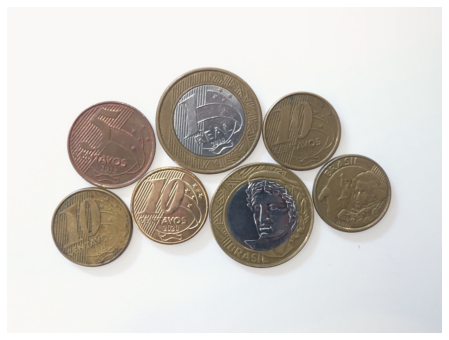

In [3]:
img = cv2.imread('/content/imagens/moedas03.jpg')
mostrar_imagem(img)

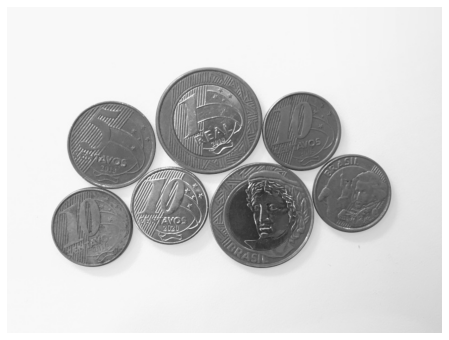

In [4]:
# Realizando a binarização
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar_imagem(imgCinza)

174.0


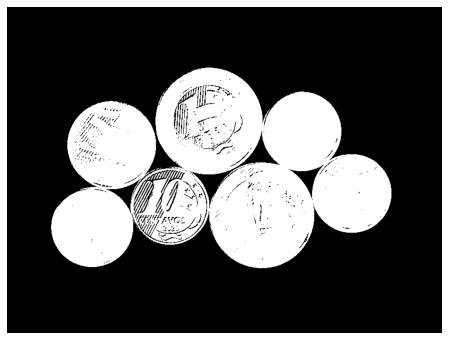

In [5]:
val, thresh = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(val)
mostrar_imagem(thresh)

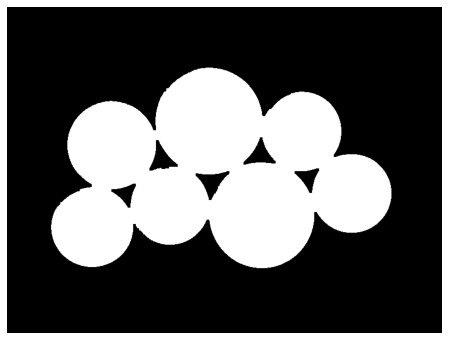

In [6]:
# Operações morfologicas para preencher os buracos
dilatacao = cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations = 2)
seg = cv2.erode(dilatacao, np.ones((3,3), np.uint8), iterations = 2)
mostrar_imagem(seg)

In [7]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

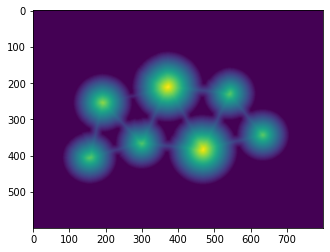

In [8]:
# Criando o mapa de distâncias Euclidianas
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist);

In [9]:
# Obtendo os picos
local_max = peak_local_max(dist, indices = False, # Determina o tipo de saída, False = os picos serão represetados como True
                           min_distance = 20,     # Distância minima entre os objetos
                           labels = seg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  after removing the cwd from sys.path.


In [10]:
local_max, local_max.shape

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]), (600, 800))

In [12]:
# Analise de componentes conectados
markers = ndi.label(local_max, structure = np.ones((3,3)))[0]
# Matriz com picos

In [16]:
markers.shape

(600, 800)

In [19]:
np.unique(markers, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([479993,      1,      1,      1,      1,      1,      1,      1]))

In [21]:
labels = watershed(-dist, # Menos, pois utiliza os valores mínimos
                   markers, mask = seg)

In [22]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [23]:
labels[280]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

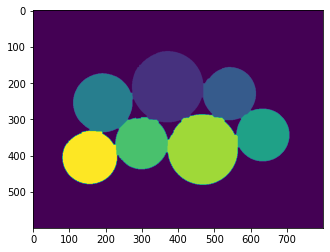

In [24]:
plt.imshow(labels);

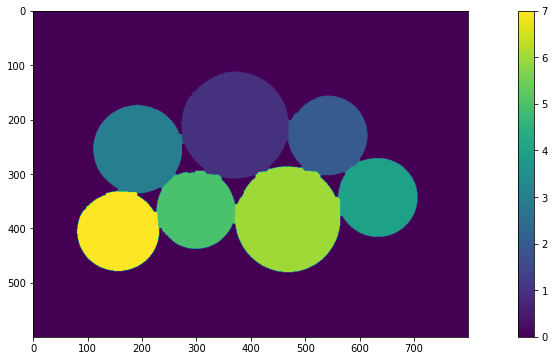

In [25]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels)
plt.colorbar(plot);

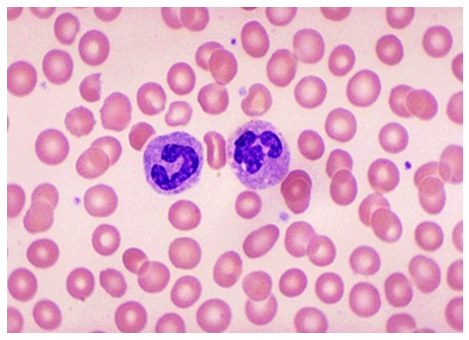

In [26]:
img = cv2.imread('/content/imagens/rbc.jpg')
mostrar_imagem(img)

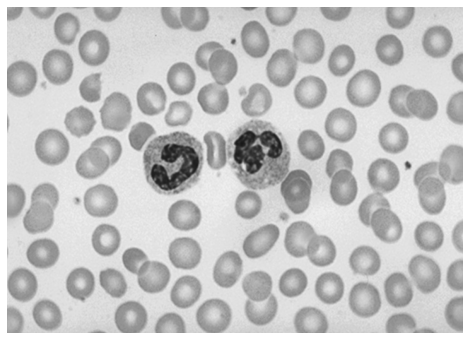

186.0


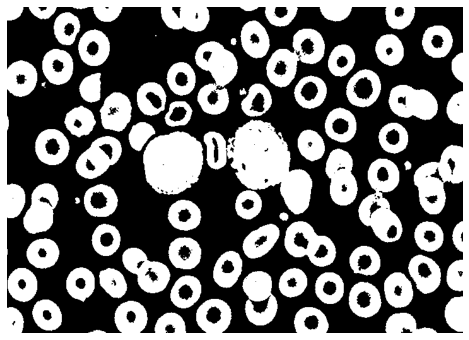

In [27]:
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar_imagem(imgCinza)

val, thresh = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(val)
mostrar_imagem(thresh)

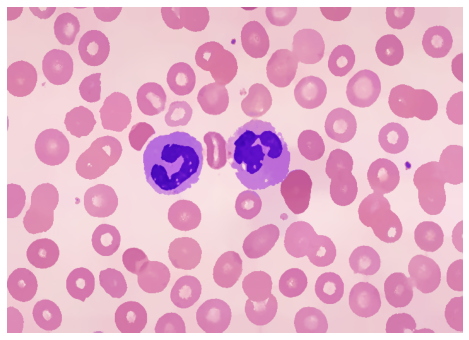

In [28]:
# Mean shiffiting -> REduz ruído e mantém a estrutura das imagens
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)
mostrar_imagem(filtro)

189.0


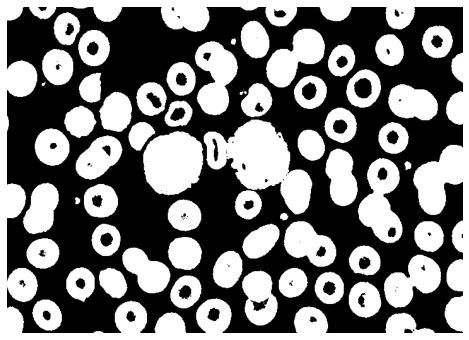

In [29]:
imgCinza = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(val)
mostrar_imagem(thresh)

In [33]:
def preencher_buracos(img_thresh, limiar = 1000):
  # 1 - Detecção de contornos
  # 2 - Verificação dos contornos abaixo do limiar
  # 3 - Adição dos contornos abaixo do limiar em uma lista
  # 4 - Preenchimento dos contornos pequenos
  contornos, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  buracos = []

  for con in contornos:
    area = cv2.contourArea(con)
    if area < limiar:
      buracos.append(con)
    
  cv2.drawContours(img_thresh, buracos, -1, 255, -1)

  return img_thresh

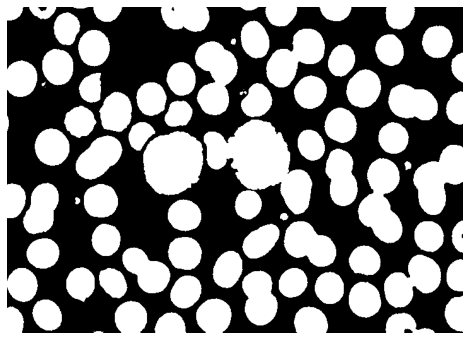

In [35]:
seg = preencher_buracos(thresh)
mostrar_imagem(seg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  This is separate from the ipykernel package so we can avoid doing imports until


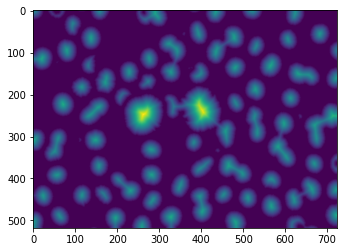

In [36]:
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist);
local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = seg)

In [38]:
markers = ndi.label(local_max, structure = np.ones((3,3)))[0]
labels = watershed(-dist, markers, mask = seg)

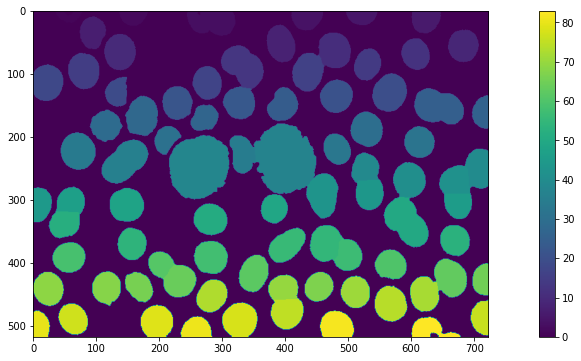

In [39]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels)
plt.colorbar(plot);

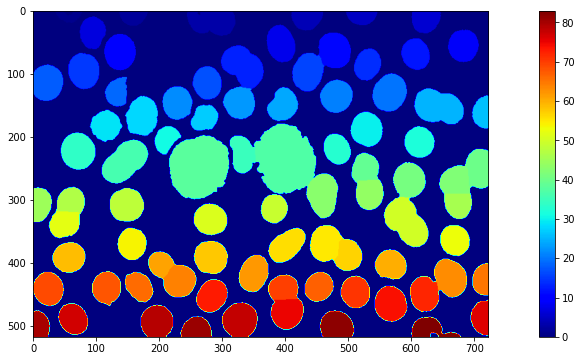

In [40]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels, cmap='jet')
plt.colorbar(plot);

In [55]:
def segmentacao_watershed(img, preenchimento = 1000):
  original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)
  imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  val, thresh = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

  if preenchimento > 0:
    thresh = preencher_buracos(thresh, preenchimento)
  
  dist = ndi.distance_transform_edt(thresh)
  dist_copy = dist.copy()
  local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = thresh)
  markers = ndi.label(local_max, structure = np.ones((3,3)))[0]
  labels = watershed(-dist, markers, mask = thresh)

  titulos = ['Imagem original', 'Limiarização', 'Distance Transform', 'Watershed']
  imagens = [original, thresh, dist_copy, labels]

  fig = plt.gcf()
  fig.set_size_inches(16,12)
  for i in range(len(imagens)):
    plt.subplot(2,2,i+1)

    if i == 3:
      cmap = 'jet'
    else:
      cmap = 'gray'

    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])
  plt.show();

  return labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':


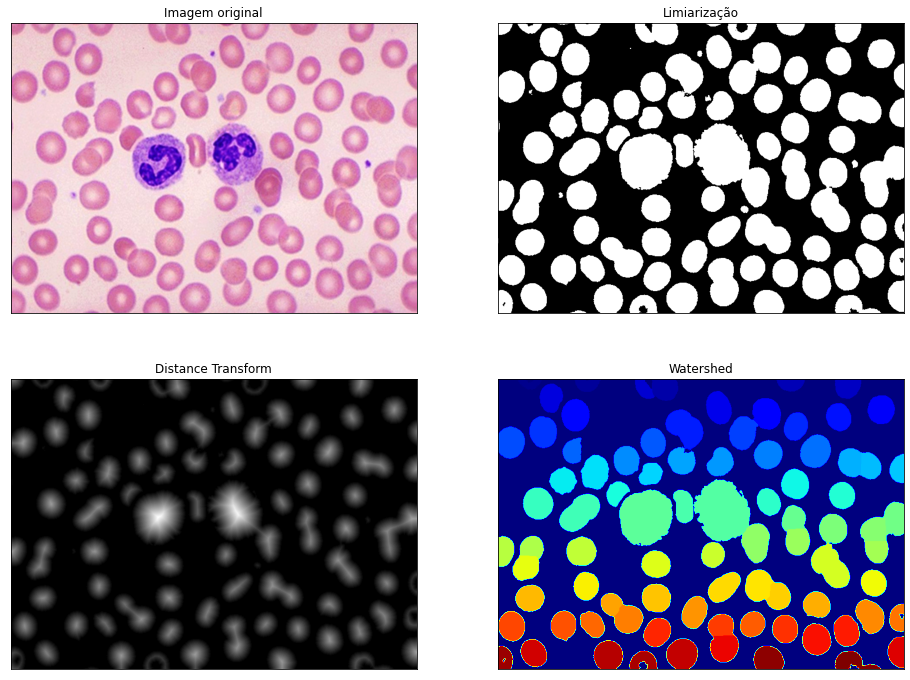

In [56]:
img = cv2.imread('/content/imagens/rbc.jpg')
seg = segmentacao_watershed(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':


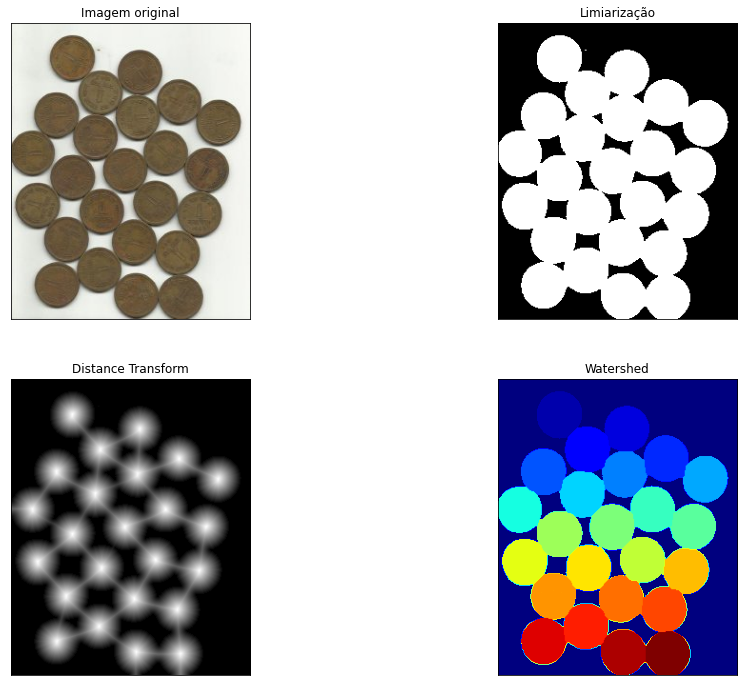

In [50]:
img = cv2.imread('/content/imagens/moedas04.jpg')
seg = segmentacao_watershed(img, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':


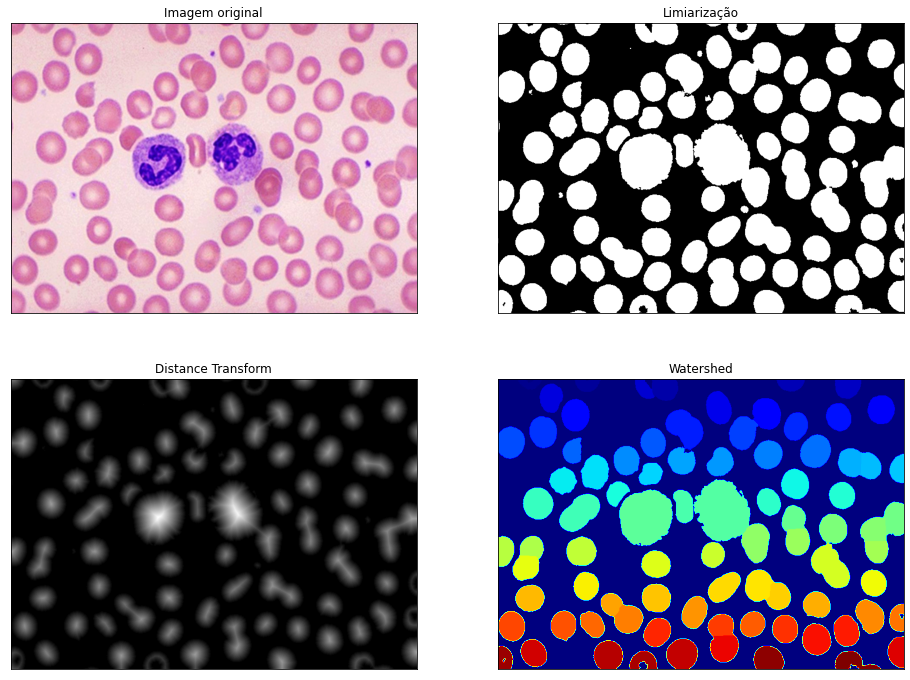

In [51]:
# Sobrepondo a imagem original
img = cv2.imread('/content/imagens/rbc.jpg')
labels = segmentacao_watershed(img)
cmap = plt.cm.jet

In [59]:
labels.min(), labels.max()

(0, 84)

In [60]:
# Normalizando a escala de cor
# Permite atribuir as cores corretamente

norm = plt.Normalize(vmin=labels.min(), vmax=labels.max())
seg_waterShed = cmap(norm(labels))

In [61]:
# Normalizando os pixels da imagem
seg_waterShed = ((seg_waterShed * 255).astype(np.uint8)) # 0 a 255
seg_waterShed = cv2.cvtColor(seg_waterShed, cv2.COLOR_RGB2BGR)

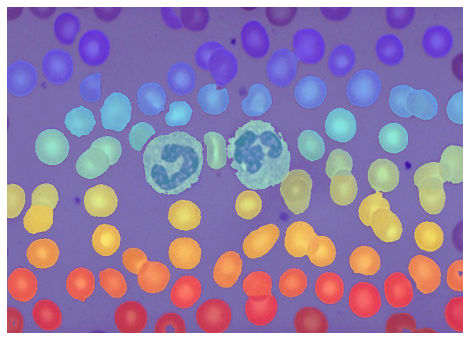

In [62]:
img_sobreposicao = cv2.addWeighted(seg_waterShed, 0.5, img, 0.5, 0)
mostrar_imagem(img_sobreposicao)

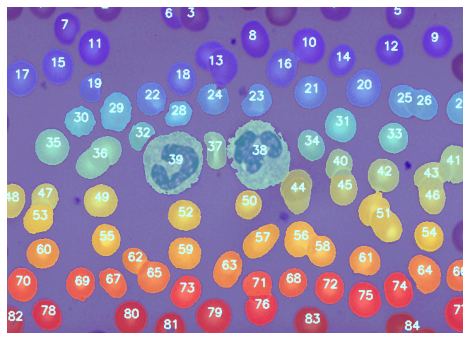

In [64]:
img_final = img_sobreposicao.copy()

for label in np.unique(labels):
  if label == 0: 
    continue
  mascara = np.zeros(imgCinza.shape, dtype = 'uint8')
  mascara[labels == label] = 255

  cnts = cv2.findContours(mascara.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]
  c = max(cnts, key = cv2.contourArea)

  ((x, y), r) = cv2.minEnclosingCircle(c)
  cv2.putText(img_final, f"{label}", (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.6, (255,255,200), 2)

mostrar_imagem(img_final)